### Абрамов А.В. ИУ5-63Б РК1 Вар. №2

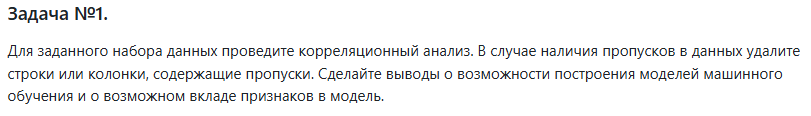

Набор данных: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

Для студентов групп ИУ5-63Б, ИУ5Ц-83Б - для произвольной колонки данных построить график "Ящик с усами (boxplot)".

### Загружаем данные и смотрим общую информация

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

### Проверяем на пропущенные значения

In [6]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

### Строим HeatMap по всем признакам

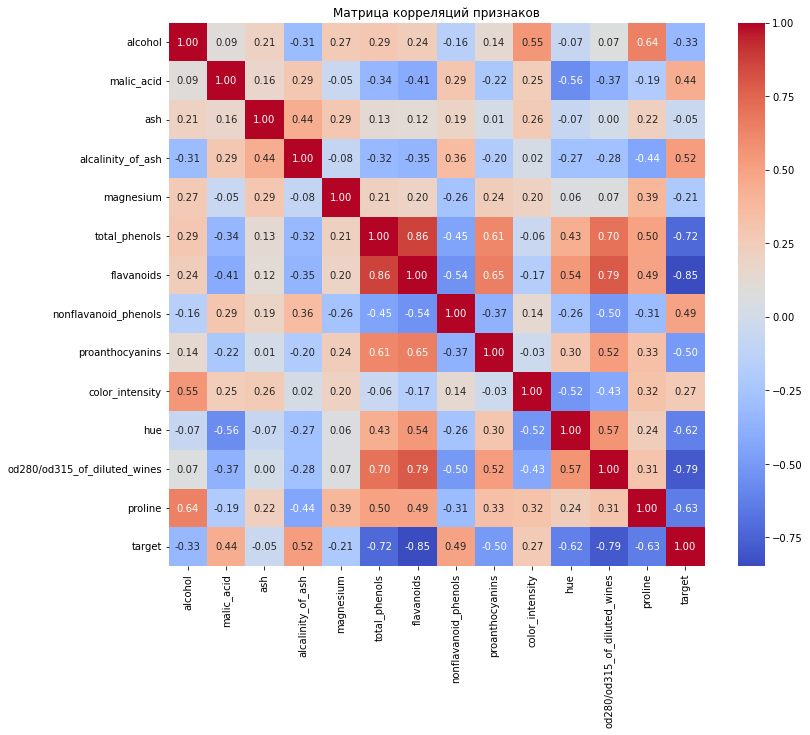

In [9]:
plt.figure(figsize=(12, 10))
correlation_matrix = wine_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляций признаков")
plt.show()

### Выберем самые коррелированные пары признаков

In [13]:
high_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr != 1].drop_duplicates()
print(high_corr.head(10))

total_phenols                 flavanoids         0.864564
target                        flavanoids         0.847498
od280/od315_of_diluted_wines  target             0.788230
                              flavanoids         0.787194
total_phenols                 target             0.719163
od280/od315_of_diluted_wines  total_phenols      0.699949
flavanoids                    proanthocyanins    0.652692
proline                       alcohol            0.643720
target                        proline            0.633717
                              hue                0.617369
dtype: float64


### Строим BoxPlot для колонки alcohol

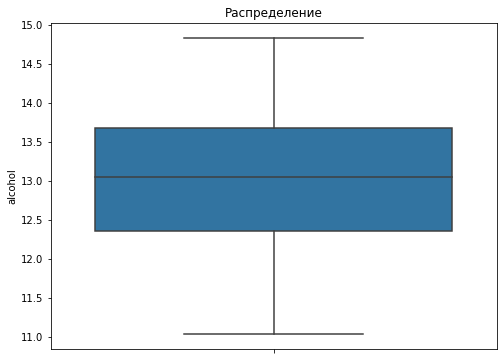

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(y=wine_df['alcohol'])
plt.title('Распределение')
plt.ylabel('alcohol')
plt.show()

## Выводы

### Качество данных: 
В наборе данных отсутствуют пропущенные значения, что позволяет использовать все имеющиеся наблюдения для анализа и построения моделей.

### Корреляционный анализ:

Высокая положительная корреляция между общим содержанием фенолов и флавоноидами (0.86).

Значительная положительная корреляция между флавоноидами и оптической плотностью (0.79).

Умеренная отрицательная корреляция между оттенком и интенсивностью цвета (-0.52).

### Для построения моделей следует:

Рассмотреть удаление одного из сильно коррелирующих признаков (например, оставить только флавоноиды вместо флавоноидов и общих фенолов) для снижения мультиколлинеарности.

Учитывать, что набор данных хорошо подходит для классификации благодаря различиям между классами.

Ожидать, что наибольший вклад в модель внесут флавоноиды, общие фенолы, оптическая плотность, пролин и интенсивность цвета из-за их значимых корреляций.